In [82]:
!pip install featuretools graphviz


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [90]:
import featuretools as ft
import numpy as np
import pandas as pd

pd.options.display.max_columns = None
df = pd.read_csv("/data/1/projects/master_thesis/rnaquanet/data/05_feature_compressed/ares_tiny/train_compressed.csv")
df_target = pd.read_csv("/data/1/projects/master_thesis/rnaquanet/data/01_raw/ares_tiny/train.csv", sep=" ")
df_target = df_target[["new_rms", "description"]]
df_target["description_id"] = df_target["description"].map(lambda x: x.split(".")[0])
df_target.drop(["description"], axis=1, inplace=True)

df["residue_id"] = np.arange(len(df))

dataframes = {
    "residues": (df, "residue_id"),
    "rmsd": (df_target, "description_id"),
}
relationships = [
    ("rmsd", "description_id", "residues", "description"),
]

In [103]:
feature_matrix_customers, features_defs = ft.dfs(
    dataframes=dataframes,
    relationships=relationships,
    agg_primitives=["skew", "count", "skew"],
    target_dataframe_name="rmsd",
)

2025-01-26 23:12:37,749 featuretools - WARNING    Attempting to add feature <Feature: SKEW(residues.aag_C1'-C2'-C3')> which is already present. This is likely a bug.
2025-01-26 23:12:37,749 featuretools - WARNING    Attempting to add feature <Feature: SKEW(residues.aag_C1'-C2'-O2')> which is already present. This is likely a bug.
2025-01-26 23:12:37,750 featuretools - WARNING    Attempting to add feature <Feature: SKEW(residues.aag_C2'-C3'-C4')> which is already present. This is likely a bug.
2025-01-26 23:12:37,750 featuretools - WARNING    Attempting to add feature <Feature: SKEW(residues.aag_C3'-O3'-P)> which is already present. This is likely a bug.
2025-01-26 23:12:37,750 featuretools - WARNING    Attempting to add feature <Feature: SKEW(residues.aag_C4'-C3'-O3')> which is already present. This is likely a bug.
2025-01-26 23:12:37,751 featuretools - WARNING    Attempting to add feature <Feature: SKEW(residues.aag_C4'-O4'-C1')> which is already present. This is likely a bug.
2025-0

/data/1/projects/master_thesis/rnaquanet/.venv/lib/python3.12/site-packages/featuretools/entityset/entityset.py:724: UserWarning: A Woodwork-initialized DataFrame was provided, so the following parameters were ignored: index
  warnings.warn(


In [98]:
feature_matrix_customers

,new_rms,COUNT(residues),SKEW(residues.aag_C1'-C2'-C3'),SKEW(residues.aag_C1'-C2'-O2'),SKEW(residues.aag_C2'-C3'-C4'),SKEW(residues.aag_C3'-O3'-P),SKEW(residues.aag_C4'-C3'-O3'),SKEW(residues.aag_C4'-O4'-C1'),SKEW(residues.aag_C5'-C4'-C3'),SKEW(residues.aag_C5'-C4'-O4'),SKEW(residues.aag_C5-C6-N1),SKEW(residues.aag_C6-N1-C2),SKEW(residues.aag_N1-C2-N3),SKEW(residues.aag_N3-C4-C5),SKEW(residues.aag_O3'-P-O5'),SKEW(residues.aag_O3'-P-OP1),SKEW(residues.aag_O3'-P-OP2),SKEW(residues.aag_O4'-C1'-C2'),SKEW(residues.aag_O5'-C5'-C4'),SKEW(residues.aag_P-O5'-C5'),SKEW(residues.ang_C3'),SKEW(residues.ang_C4'),SKEW(residues.ang_C5'),SKEW(residues.ang_O3'),SKEW(residues.ang_O5'),SKEW(residues.ang_OP1),SKEW(residues.ang_OP2),SKEW(residues.ang_P),SKEW(residues.atr_C1'-C2'-C3'-C4'),SKEW(residues.atr_C2'-C3'-C4'-O4'),SKEW(residues.atr_C2-N3-C4-C5),SKEW(residues.atr_C3'-C4'-O4'-C1'),SKEW(residues.atr_C3'-O3'-P-O5'),SKEW(residues.atr_C3'-O3'-P-OP1),SKEW(residues.atr_C3'-O3'-P-OP2),SKEW(residues.atr_C4'-C3'-O3'-P),SKEW(residues.atr_C4'-O4'-C1'-C2'),SKEW(residues.atr_C4-C5-C6-N1),SKEW(residues.atr_C5'-C4'-C3'-C2'),SKEW(residues.atr_C5'-C4'-C3'-O3'),SKEW(residues.atr_C5'-C4'-O4'-C1'),SKEW(residues.atr_C5-C6-N1-C2),SKEW(residues.atr_C6-N1-C2-N3),SKEW(residues.atr_N1-C2-N3-C4),SKEW(residues.atr_N3-C4-C5-C6),SKEW(residues.atr_O3'-P-O5'-C5'),SKEW(residues.atr_O4'-C1'-C2'-C3'),SKEW(residues.atr_O4'-C1'-C2'-O2'),SKEW(residues.atr_O5'-C5'-C4'-C3'),SKEW(residues.atr_O5'-C5'-C4'-O4'),SKEW(residues.atr_P-O5'-C5'-C4'),SKEW(residues.bon_C1'-C2'),SKEW(residues.bon_C2'-O2'),SKEW(residues.bon_C2-N3),SKEW(residues.bon_C3'-C2'),SKEW(residues.bon_C3'-O3'),SKEW(residues.bon_C4'-C3'),SKEW(residues.bon_C4'-O4'),SKEW(residues.bon_C5'-C4'),SKEW(residues.bon_C5-C6),SKEW(residues.bon_C6-N1),SKEW(residues.bon_N1-C2),SKEW(residues.bon_N3-C4),SKEW(residues.bon_O3'-P),SKEW(residues.bon_O4'-C1'),SKEW(residues.bon_O5'-C5'),SKEW(residues.bon_OP1-P),SKEW(residues.bon_OP2-P),SKEW(residues.bon_P-O5'),SKEW(residues.ds1),SKEW(residues.ds2),SKEW(residues.ds3),SKEW(residues.ds4),SKEW(residues.ds5),SKEW(residues.ds6),SKEW(residues.ds7),SKEW(residues.residue_no),SKEW(residues.x),SKEW(residues.y),SKEW(residues.z),-(new_rms),SKEW(residues.-(aag_C1'-C2'-C3')),SKEW(residues.-(aag_C1'-C2'-O2')),SKEW(residues.-(aag_C2'-C3'-C4')),SKEW(residues.-(aag_C3'-O3'-P)),SKEW(residues.-(aag_C4'-C3'-O3')),SKEW(residues.-(aag_C4'-O4'-C1')),SKEW(residues.-(aag_C5'-C4'-C3')),SKEW(residues.-(aag_C5'-C4'-O4')),SKEW(residues.-(aag_C5-C6-N1)),SKEW(residues.-(aag_C6-N1-C2)),SKEW(residues.-(aag_N1-C2-N3)),SKEW(residues.-(aag_N3-C4-C5)),SKEW(residues.-(aag_O3'-P-O5')),SKEW(residues.-(aag_O3'-P-OP1)),SKEW(residues.-(aag_O3'-P-OP2)),SKEW(residues.-(aag_O4'-C1'-C2')),SKEW(residues.-(aag_O5'-C5'-C4')),SKEW(residues.-(aag_P-O5'-C5')),SKEW(residues.-(ang_C3')),SKEW(residues.-(ang_C4')),SKEW(residues.-(ang_C5')),SKEW(residues.-(ang_O3')),SKEW(residues.-(ang_O5')),SKEW(residues.-(ang_OP1)),SKEW(residues.-(ang_OP2)),SKEW(residues.-(ang_P)),SKEW(residues.-(atr_C1'-C2'-C3'-C4')),SKEW(residues.-(atr_C2'-C3'-C4'-O4')),SKEW(residues.-(atr_C2-N3-C4-C5)),SKEW(residues.-(atr_C3'-C4'-O4'-C1')),SKEW(residues.-(atr_C3'-O3'-P-O5')),SKEW(residues.-(atr_C3'-O3'-P-OP1)),SKEW(residues.-(atr_C3'-O3'-P-OP2)),SKEW(residues.-(atr_C4'-C3'-O3'-P)),SKEW(residues.-(atr_C4'-O4'-C1'-C2')),SKEW(residues.-(atr_C4-C5-C6-N1)),SKEW(residues.-(atr_C5'-C4'-C3'-C2')),SKEW(residues.-(atr_C5'-C4'-C3'-O3')),SKEW(residues.-(atr_C5'-C4'-O4'-C1')),SKEW(residues.-(atr_C5-C6-N1-C2)),SKEW(residues.-(atr_C6-N1-C2-N3)),SKEW(residues.-(atr_N1-C2-N3-C4)),SKEW(residues.-(atr_N3-C4-C5-C6)),SKEW(residues.-(atr_O3'-P-O5'-C5')),SKEW(residues.-(atr_O4'-C1'-C2'-C3')),SKEW(residues.-(atr_O4'-C1'-C2'-O2')),SKEW(residues.-(atr_O5'-C5'-C4'-C3')),SKEW(residues.-(atr_O5'-C5'-C4'-O4')),SKEW(residues.-(atr_P-O5'-C5'-C4')),SKEW(residues.-(bon_C1'-C2')),SKEW(residues.-(bon_C2'-O2')),SKEW(residues.-(bon_C2-N3)),SKEW(residues.-(bon_C3'-C2')),SKEW(residues.-(bon_C3'-O3')),SKEW(residues.-(b

In [104]:
feature = features_defs[0]
feature

<Feature: new_rms>

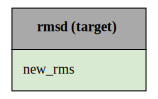

In [88]:
ft.graph_feature(feature)

In [107]:
from featuretools.selection import (
    remove_highly_correlated_features,
    remove_highly_null_features,
    remove_single_value_features,
)

new_fm, new_features = remove_highly_correlated_features(
    feature_matrix_customers,
    features=features_defs,
)
new_fm.head()

/data/1/projects/master_thesis/rnaquanet/.venv/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/data/1/projects/master_thesis/rnaquanet/.venv/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/data/1/projects/master_thesis/rnaquanet/.venv/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/data/1/projects/master_thesis/rnaquanet/.venv/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/data/1/projects/master_thesis/rnaquanet/.venv/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/data/1/projects/master_thesis/rnaquanet/.venv/lib/python3.12/site-packages/nump

,new_rms,COUNT(residues),SKEW(residues.aag_C1'-C2'-C3'),SKEW(residues.aag_C1'-C2'-O2'),SKEW(residues.aag_C2'-C3'-C4'),SKEW(residues.aag_C3'-O3'-P),SKEW(residues.aag_C4'-C3'-O3'),SKEW(residues.aag_C4'-O4'-C1'),SKEW(residues.aag_C5'-C4'-C3'),SKEW(residues.aag_C5-C6-N1),SKEW(residues.aag_C6-N1-C2),SKEW(residues.aag_N1-C2-N3),SKEW(residues.aag_O3'-P-O5'),SKEW(residues.aag_O4'-C1'-C2'),SKEW(residues.aag_P-O5'-C5'),SKEW(residues.atr_C1'-C2'-C3'-C4'),SKEW(residues.atr_C2-N3-C4-C5),SKEW(residues.atr_C3'-O3'-P-O5'),SKEW(residues.atr_C3'-O3'-P-OP2),SKEW(residues.atr_C4'-C3'-O3'-P),SKEW(residues.atr_C4-C5-C6-N1),SKEW(residues.atr_N1-C2-N3-C4),SKEW(residues.atr_O3'-P-O5'-C5'),SKEW(residues.atr_O5'-C5'-C4'-C3'),SKEW(residues.atr_O5'-C5'-C4'-O4'),SKEW(residues.bon_C1'-C2'),SKEW(residues.bon_C2'-O2'),SKEW(residues.bon_C2-N3),SKEW(residues.bon_C3'-C2'),SKEW(residues.bon_C4'-C3'),SKEW(residues.bon_C5'-C4'),SKEW(residues.bon_C6-N1),SKEW(residues.bon_N1-C2),SKEW(residues.bon_N3-C4),SKEW(residues.bon_O3'-P),SKEW(residues.bon_O5'-C5'),SKEW(residues.bon_OP1-P),SKEW(residues.bon_OP2-P),SKEW(residues.ds1),SKEW(residues.residue_no),SKEW(residues.x),SKEW(residues.y),SKEW(residues.z)
description_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
157d_S_000004_minimize_001,6.463,24,1.382005,-1.246832,1.248276,2.080856,-0.524041,2.093346,-0.973554,-0.297683,0.480563,-0.054584,1.247364,-2.190058,-1.725064,-4.820952,-0.887556,0.746016,-0.678084,2.204637,-1.092670,-1.281871,1.194512,-1.662092,1.595169,-1.502565,0.825444,0.595324,0.944653,-0.280880,-0.877074,-0.265127,-0.421411,1.383934,0.893314,-0.607693,0.826418,-2.047521,-0.527829,0.0,0.095100,-0.211645,-0.052875
157d_S_000005_minimize_006,12.900,24,-0.657703,1.923613,1.399408,-0.155829,-1.978392,-0.466128,-2.057411,-0.300573,0.502035,-0.077721,1.602810,-0.438354,0.903816,-3.191123,-0.336873,1.903677,0.585631,0.337304,0.726826,-0.759357,1.933325,-1.033718,-0.221521,-2.515439,0.239286,0.627477,-0.421411,-0.125861,-0.663535,-0.236499,-0.303430,1.202405,-0.667310,-0.349849,0.026299,0.794082,-0.527247,0.0,0.210275,0.268719,0.001470
157d_S_000010_minimize_007,5.600,24,2.241575,-0.420610,2.281303,3.143668,0.003796,1.614306,-1.429623,-0.297567,0.496817,-0.048873,0.993935,-0.279984,-1.797128,-2.861174,0.174069,1.344047,-1.306002,3.648541,-1.065910,1.321137,0.928537,1.076301,1.213154,-0.054304,0.596997,0.656037,1.839474,-0.535038,-0.645624,-0.301086,-0.232774,1.269818,1.714804,-0.532827,-0.105279,0.619609,-0.526932,0.0,-0.056686,0.010165,0.295711
157d_S_000014_minimize_001,4.786,24,0.649953,-0.497777,0.197674,1.333276,-0.942248,0.505703,-1.321558,-0.301928,0.503013,-0.091635,1.953842,0.059405,-0.123069,-1.092874,1.600043,3.702676,-4.182674,4.598035,-1.221745,-0.120289,1.633219,-1.512113,1.608110,-1.391615,0.332916,0.558278,-0.982359,-1.669822,-0.677606,-0.314926,-0.443610,1.342843,-4.573774,-0.550657,-0.292163,-0.257356,-0.527018,0.0,-0.307735,-0.076817,0.016470
157d_S_000014_minimize_006,8.363,24,1.645645,1.521046,0.111811,3.225037,-0.233674,0.893245,-1.551954,-0.301149,0.483125,-0.057981,2.640805,-0.821998,-0.634689,-2.409594,-0.040748,3.090830,-1.256908,3.035615,-0.927786,0.206113,0.907437,-1.070471,0.991748,-0.334746,0.448686,0.562633,1.776508,-1.005804,0.009253,-0.288282,-0.388355,1.352524,-4.165452,-0.733381,-0.934850,-0.226211,-0.527660,0.0,-0.283887,-0.199717,0.021729
